In [1]:
] activate .

  Activating project at `~/Projects/HTM/Notebooks`


In [2]:
using HierarchicalTemporalMemory
using MLDatasets: MNIST
using Plots
using ProgressMeter
using Random: shuffle

In [3]:
data = MNIST(split=:train)

dataset MNIST:
  metadata    =>    Dict{String, Any} with 3 entries
  split       =>    :train
  features    =>    28×28×60000 Array{Float32, 3}
  targets     =>    60000-element Vector{Int64}

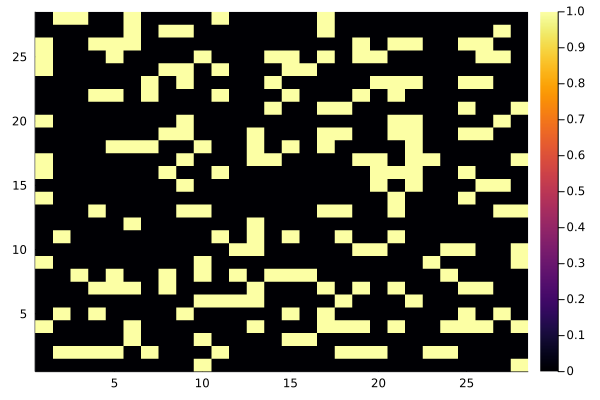

In [4]:
prms = SPParams(szᵢₙ = (28, 28), szₛₚ = (10, 10), γ=28, β=100, Tboost=1000)
sp = SpatialPooler(prms);
heatmap(reshape(sp.synapses.connected[:, 50], 28, 28))

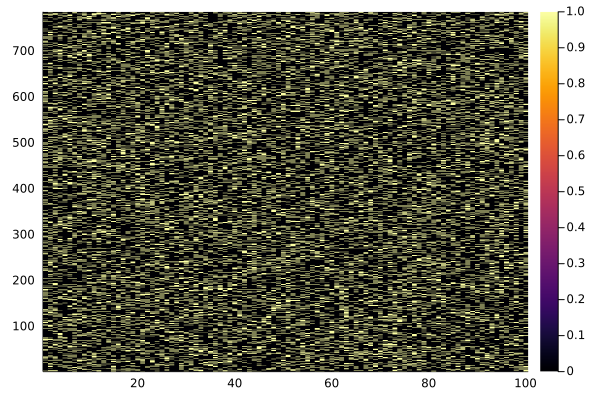

In [5]:
heatmap(Array(sp.synapses.connected))

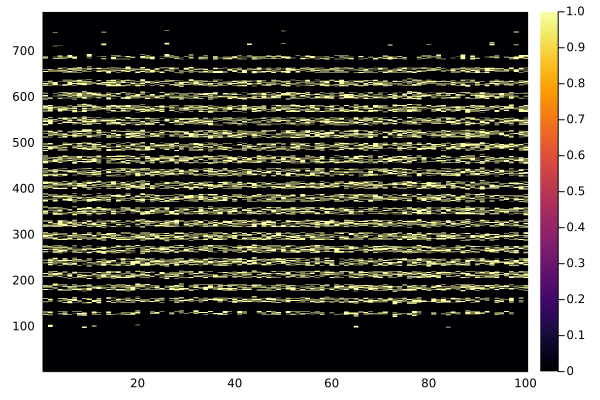

In [6]:
for i in shuffle(1:60_000)
    X = data.features[:, :, i]
    B = BitArray(X .> 0)
    step!(sp, B)
end
heatmap(sp.synapses.connected)

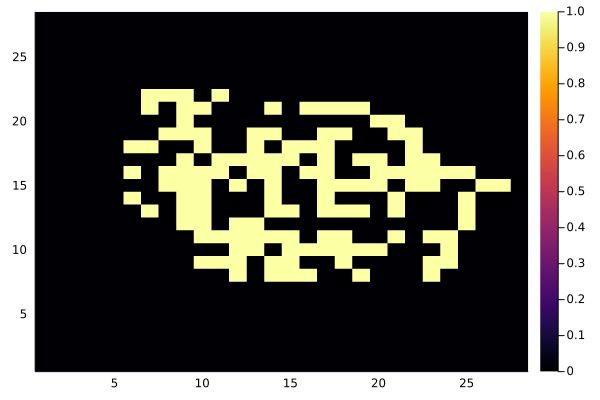

In [7]:
heatmap(reshape(sp.synapses.connected[:, 50], 28, 28))

In [8]:
sp(BitArray(rand(28, 28) .> 0))

10×10 BitMatrix:
 0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  1  0
 0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0

Progress: 100%|█████████████████████████████████████████| Time: 0:02:33


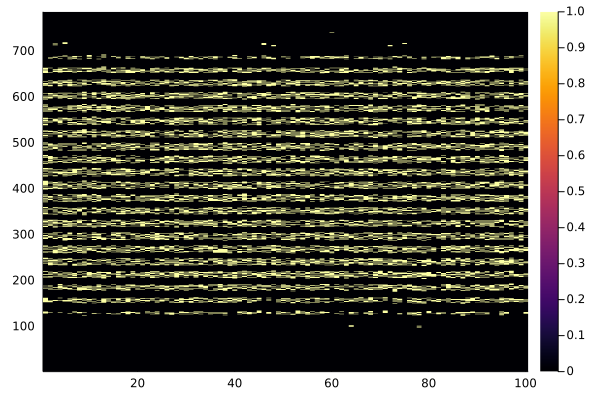

In [9]:
@showprogress for i in 1:10
    for i in shuffle(1:60_000)
        X = data.features[:, :, i]
        B = BitArray(X .> 0)
        step!(sp, B)
    end
end
heatmap(sp.synapses.connected)

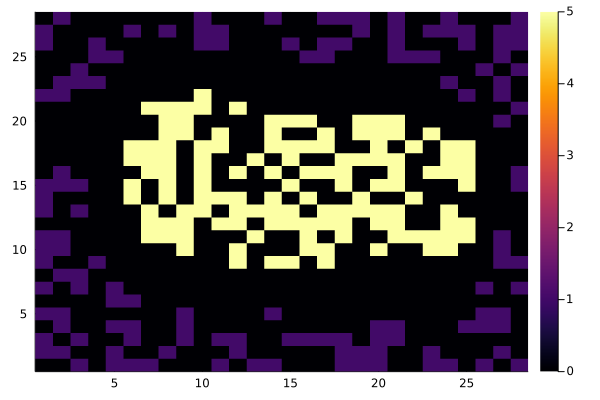

In [10]:
visual_field = zeros(28, 28)
visual_field[reshape(sp.synapses.Dₚ[:, 10], 28, 28) .== true] .= 1
visual_field[reshape(sp.synapses.connected[:, 10], 28, 28) .== true] .= 5

heatmap(visual_field)

Progress: 100%|█████████████████████████████████████████| Time: 0:26:45


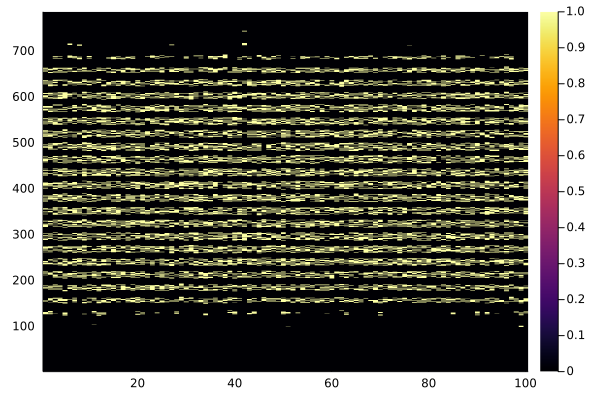

In [112]:
@showprogress for i in 1:100
    for i in shuffle(1:60_000)
        X = data.features[:, :, i]
        B = BitArray(X .> 0)
        step!(sp, B)
    end
end
heatmap(sp.synapses.connected)

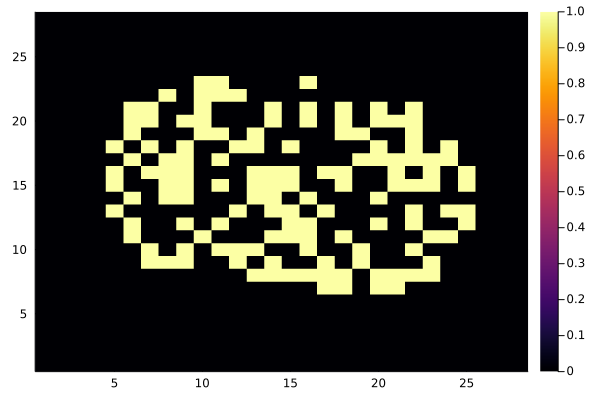

In [131]:
heatmap(reshape(sp.synapses.connected[:, 10], 28, 28))

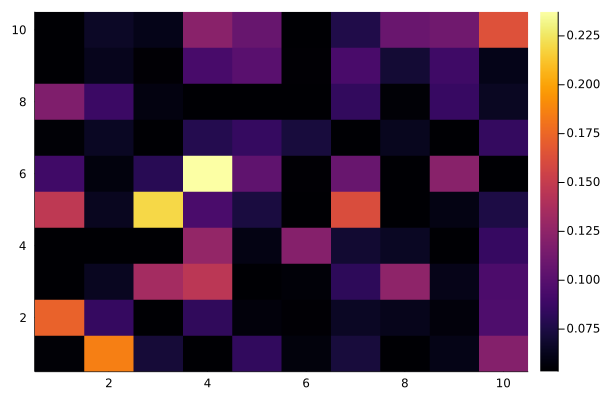

In [134]:
heatmap(sp.åₜ)

In [12]:
X = BitArray(data.features[:, :, 1] .> 0)
sp(X)

10×10 BitMatrix:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0

In [24]:
kwta(k::Int, x::AbstractArray) = sortperm(x, alg=PartialQuickSort(k), rev=true)[1:k]
winner_idx = kwta(5, sp.b .* sp.synapses.connected' * reshape(X, :))

active = zeros(Bool, 100)
active[winner_idx] .= true
reshape(active, 10, 10)

10×10 Matrix{Bool}:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  1  0  1  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

100-element Vector{Float32}:
 10.032988
  0.23954092
  0.01959055
 12.721943
 25.041634
  8.3400664f-5
  0.4534051
  0.22890353
  0.0009145762
  0.0027629412
  0.00079126086
  0.28689605
  0.023472395
  ⋮
 11.416275
 22.834553
  0.043453243
  5.485248
  0.00020889305
 32.199127
  0.021162162
  0.4151513
 18.563543
  0.18906364
  4.4028535
  0.6684687